<a href="https://colab.research.google.com/github/Mohana-AI/XAI-Explainable-AI/blob/main/Diabetes_prediction_LIME_and_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Prediction using Machine Learning Algorithm and Model Explained with LIME**

**Import Necessary files**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load Dataset**

In [2]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/ML-Learning/Datasets/diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabetes_df.shape

(768, 9)

In [4]:
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

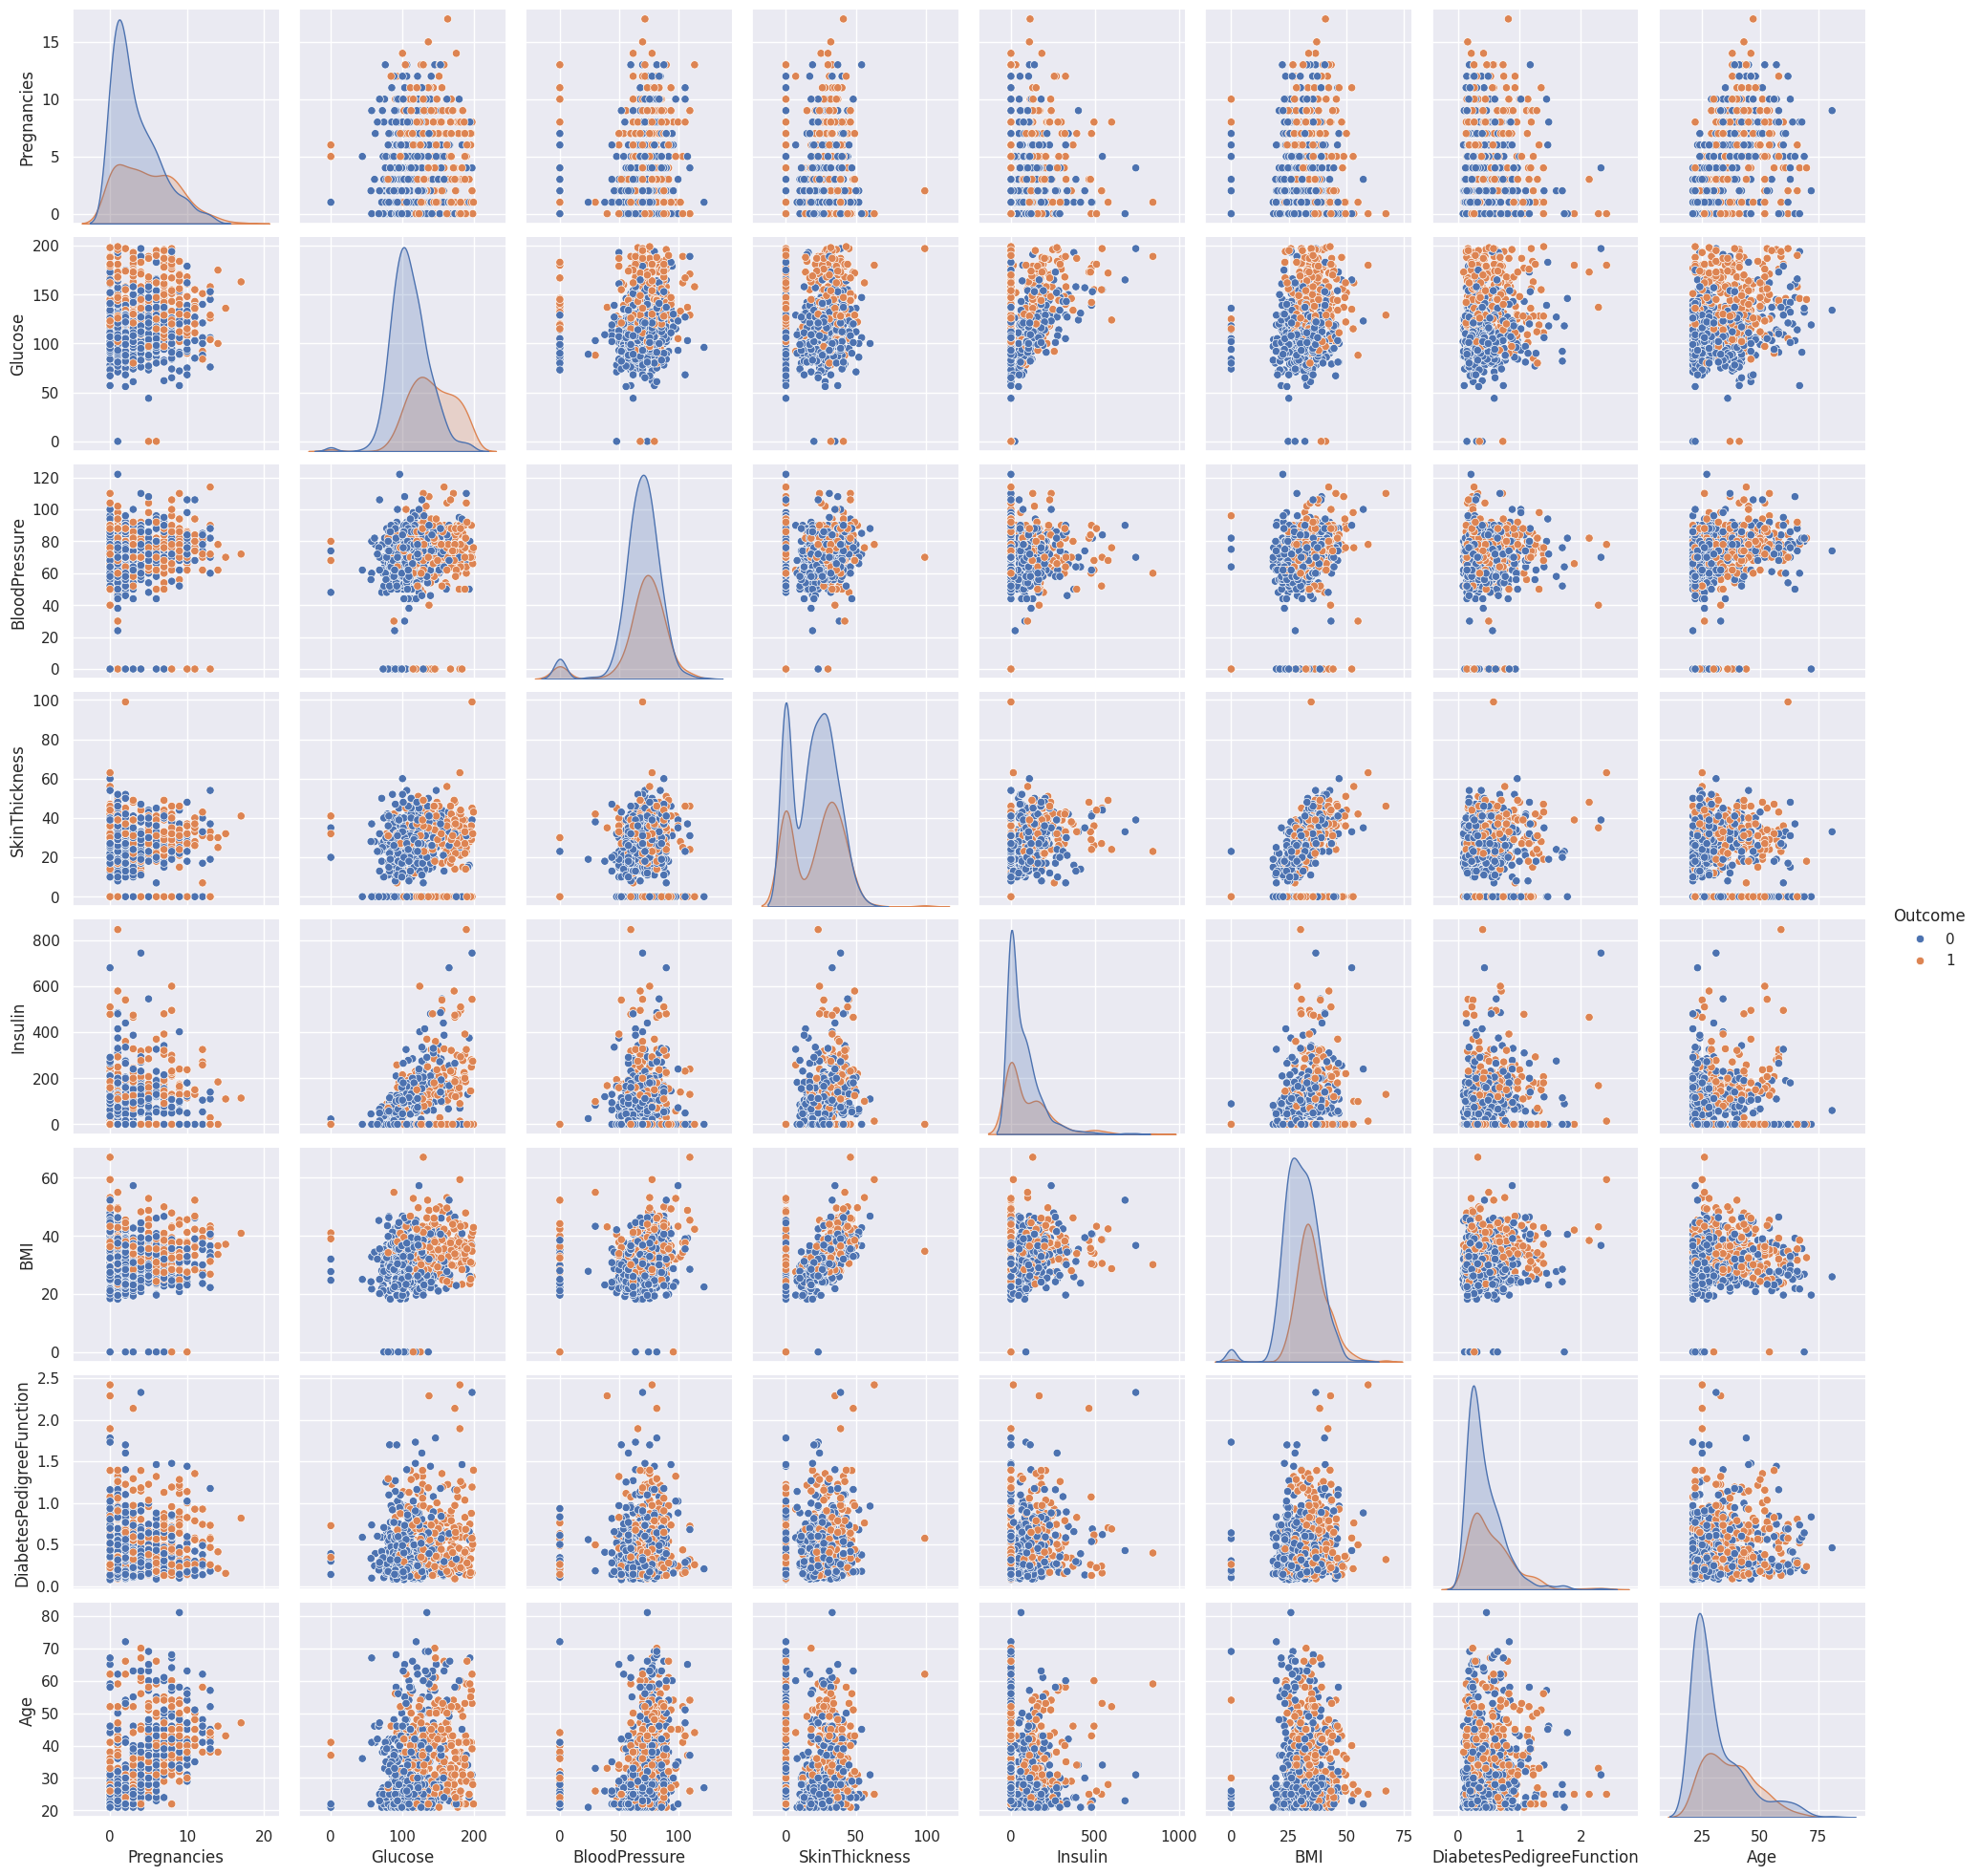

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [5]:
sns.pairplot(diabetes_df,hue='Outcome')
plt.show()
correlation=diabetes_df.corr()
correlation

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

**Exploratory Data Analysis (EDA)**

In [6]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [10]:
diabetes_df.isnull().head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        False    False          False          False    False  False   
1        False    False          False          False    False  False   
2        False    False          False          False    False  False   
3        False    False          False          False    False  False   
4        False    False          False          False    False  False   
5        False    False          False          False    False  False   
6        False    False          False          False    False  False   
7        False    False          False          False    False  False   
8        False    False          False          False    False  False   
9        False    False          False          False    False  False   

   DiabetesPedigreeFunction    Age  Outcome  
0                     False  False    False  
1                     False  False    False  
2                     False  False    False  
3                     False  False    False  
4                     False  False    False  
5                     False  False    False  
6                     False  False    False  
7                     False  False    False  
8                     False  False    False  
9                     False  False    False

In [11]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value.

In [12]:
diabetes_df_copy = diabetes_df.copy(deep = True)

In [13]:
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


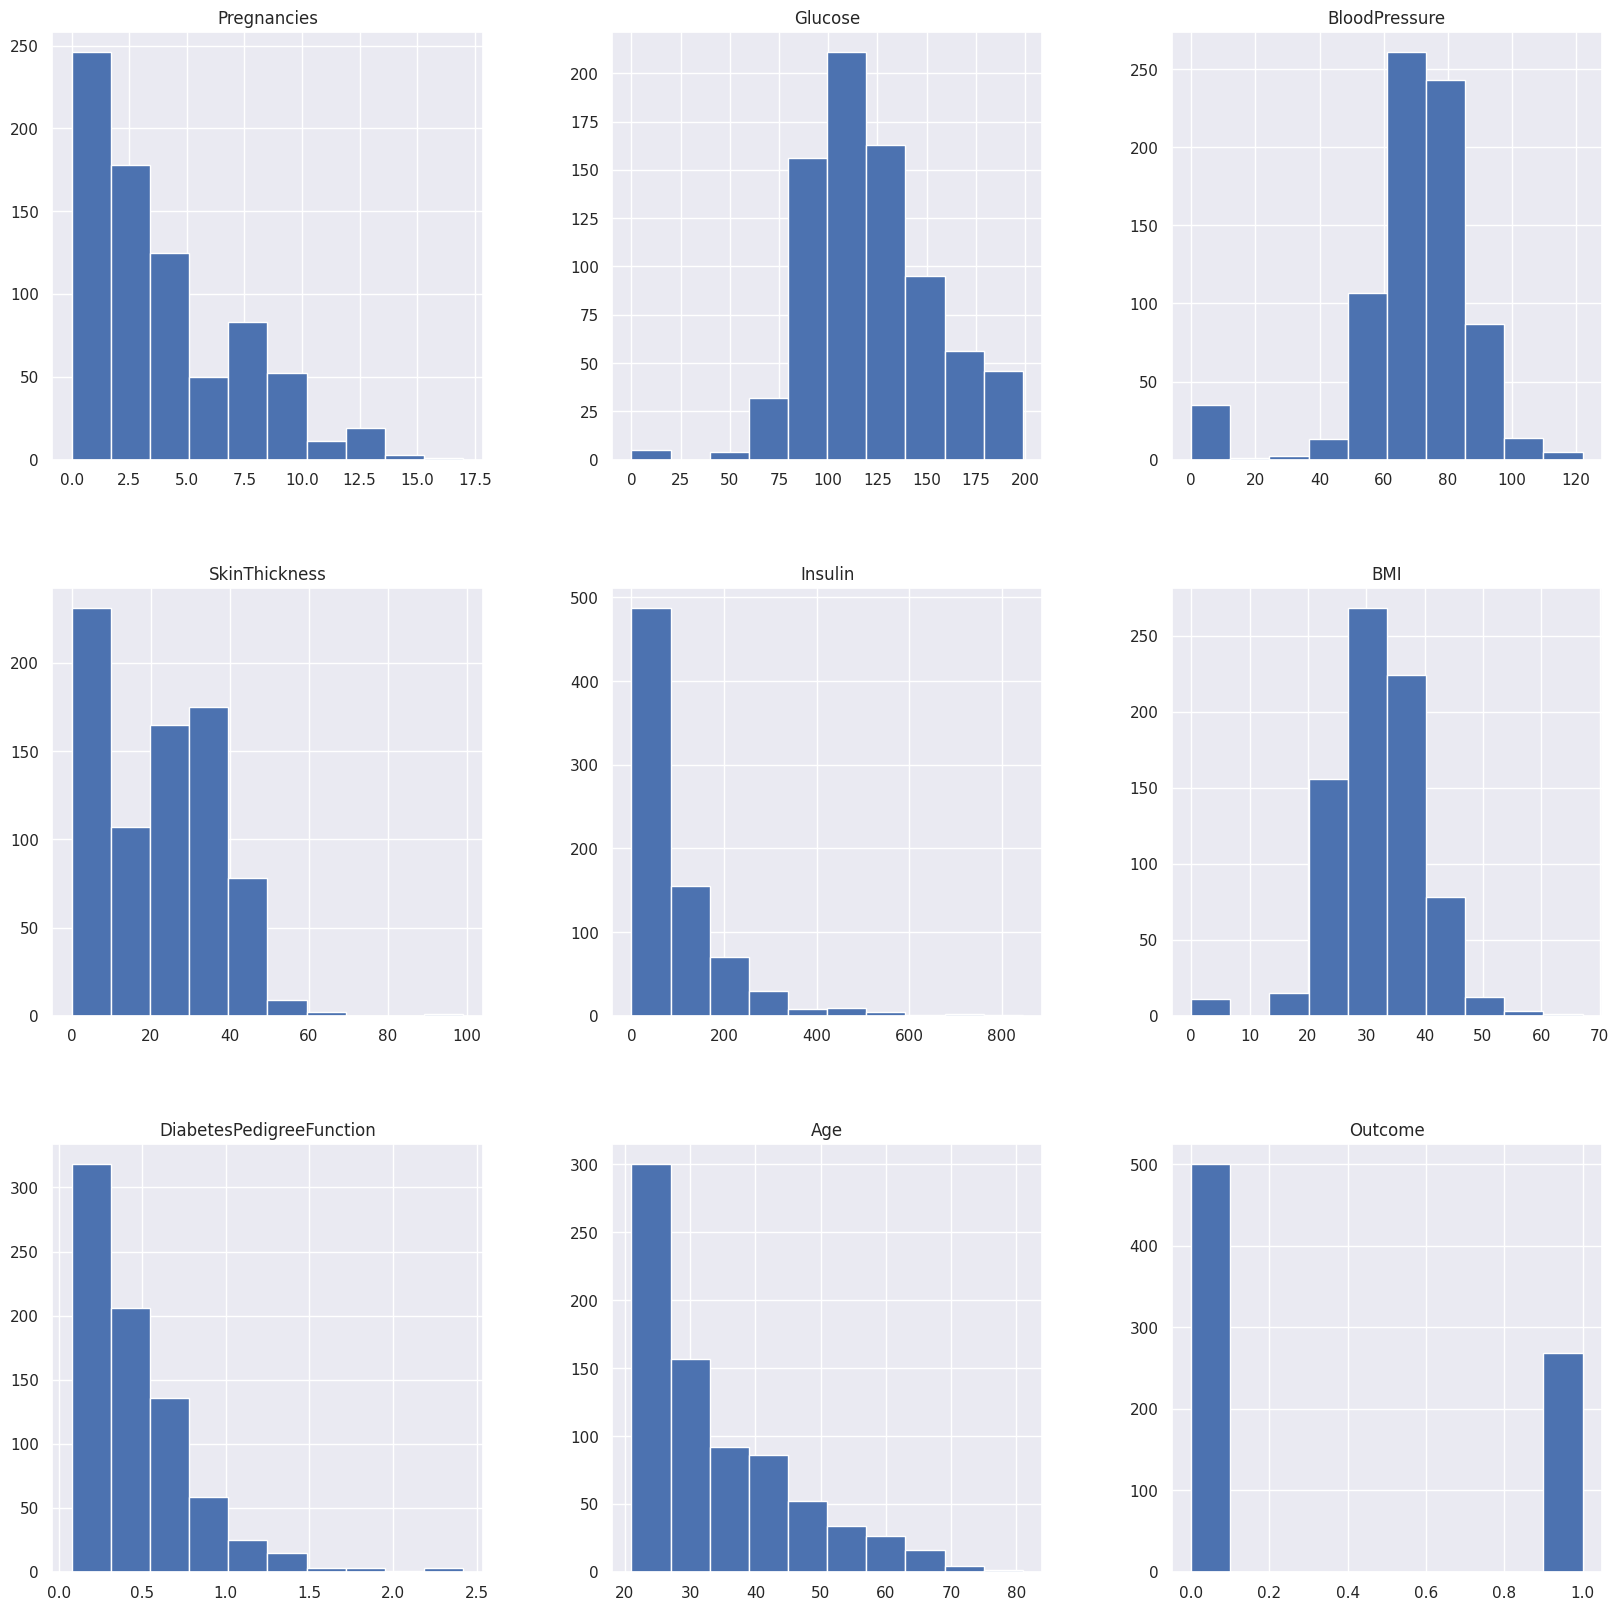

In [15]:
p = diabetes_df.hist(figsize = (20,20))

we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

In [16]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)

In [17]:
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)

In [18]:
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

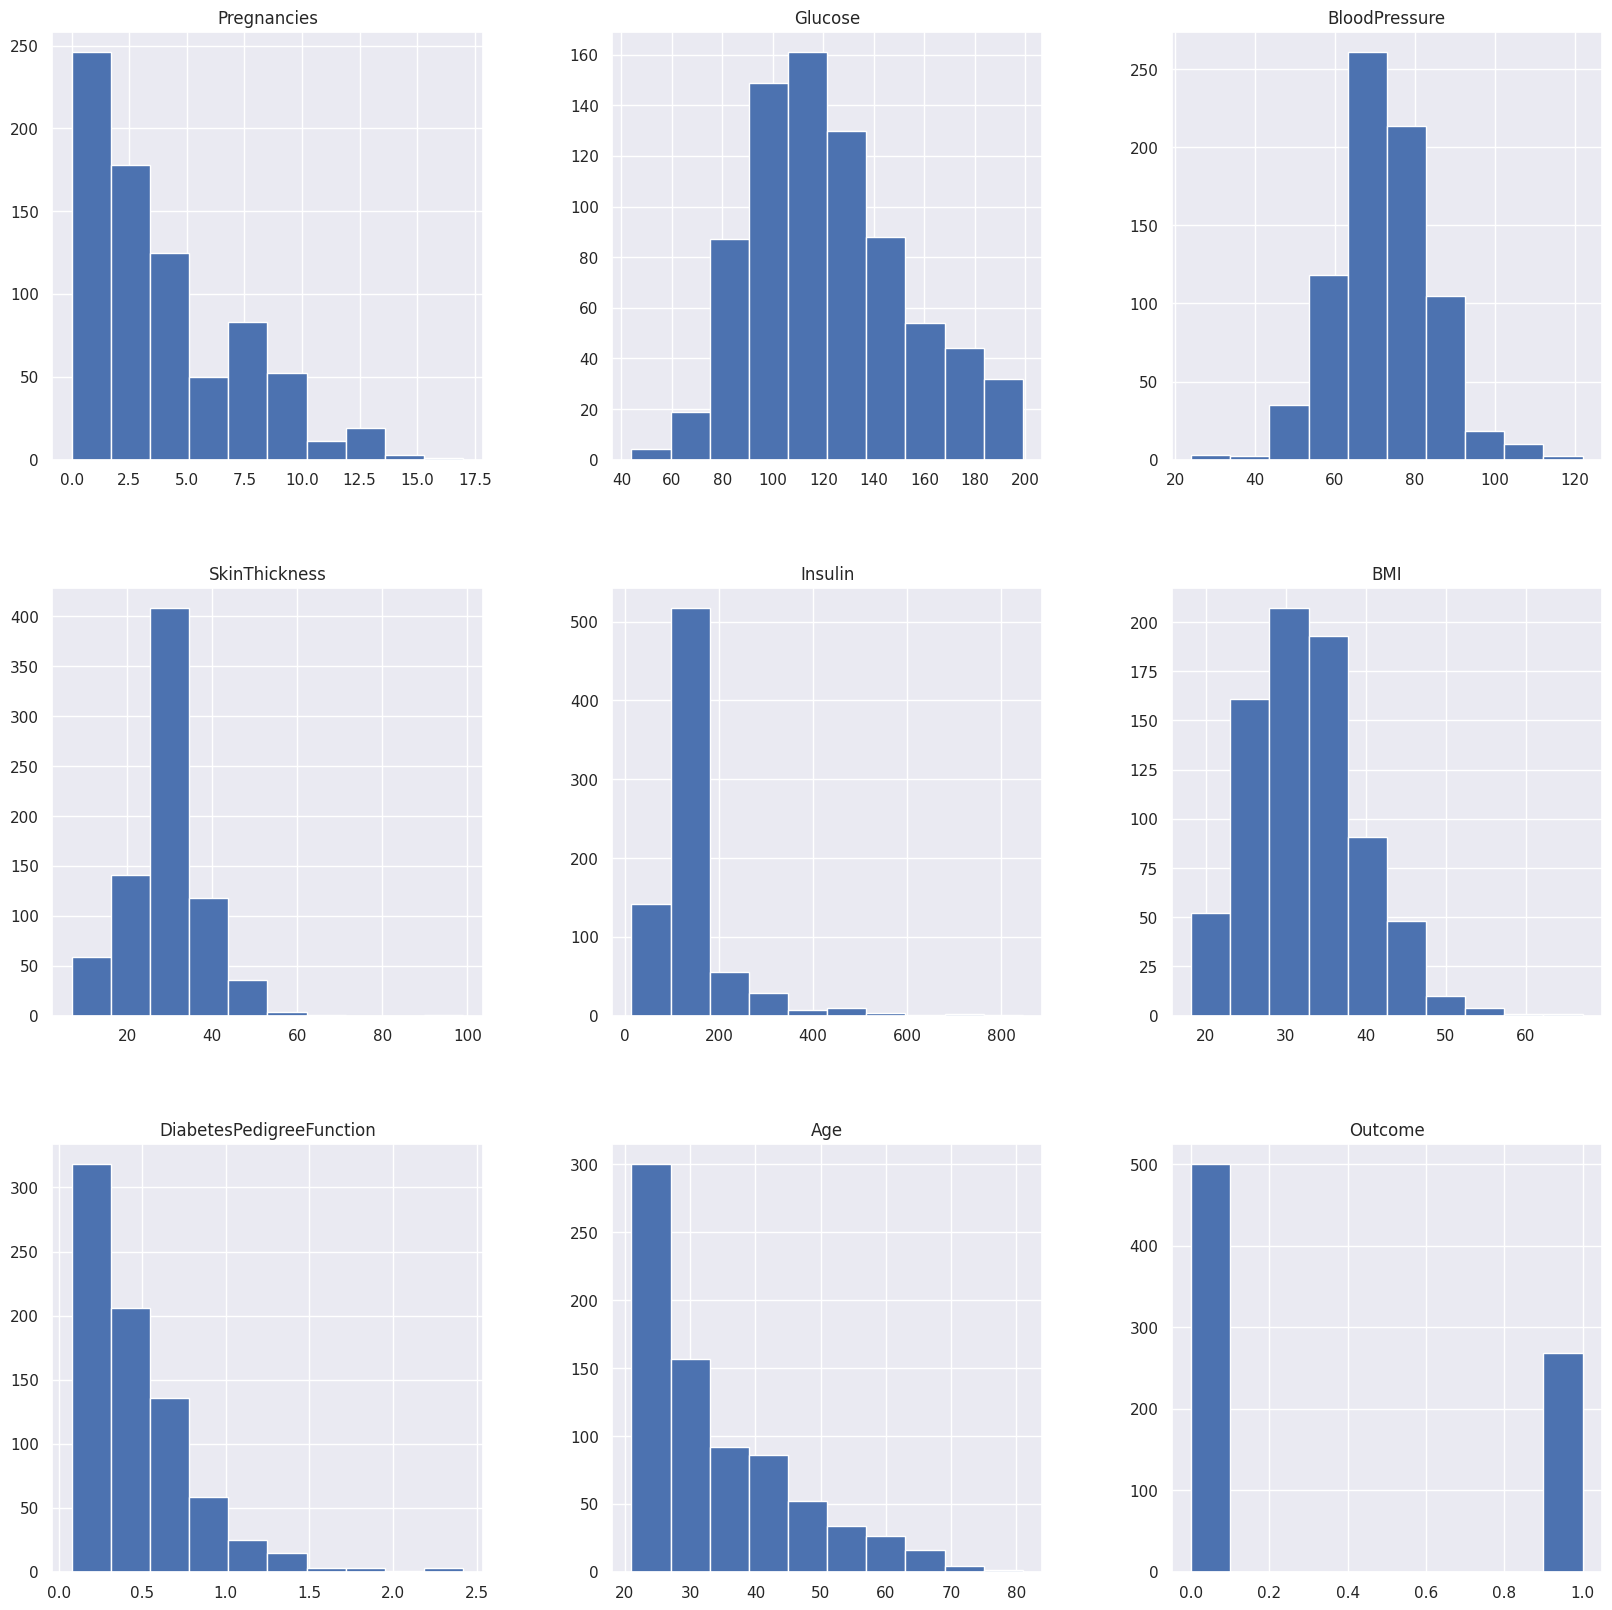

In [19]:
p = diabetes_df_copy.hist(figsize = (20,20))

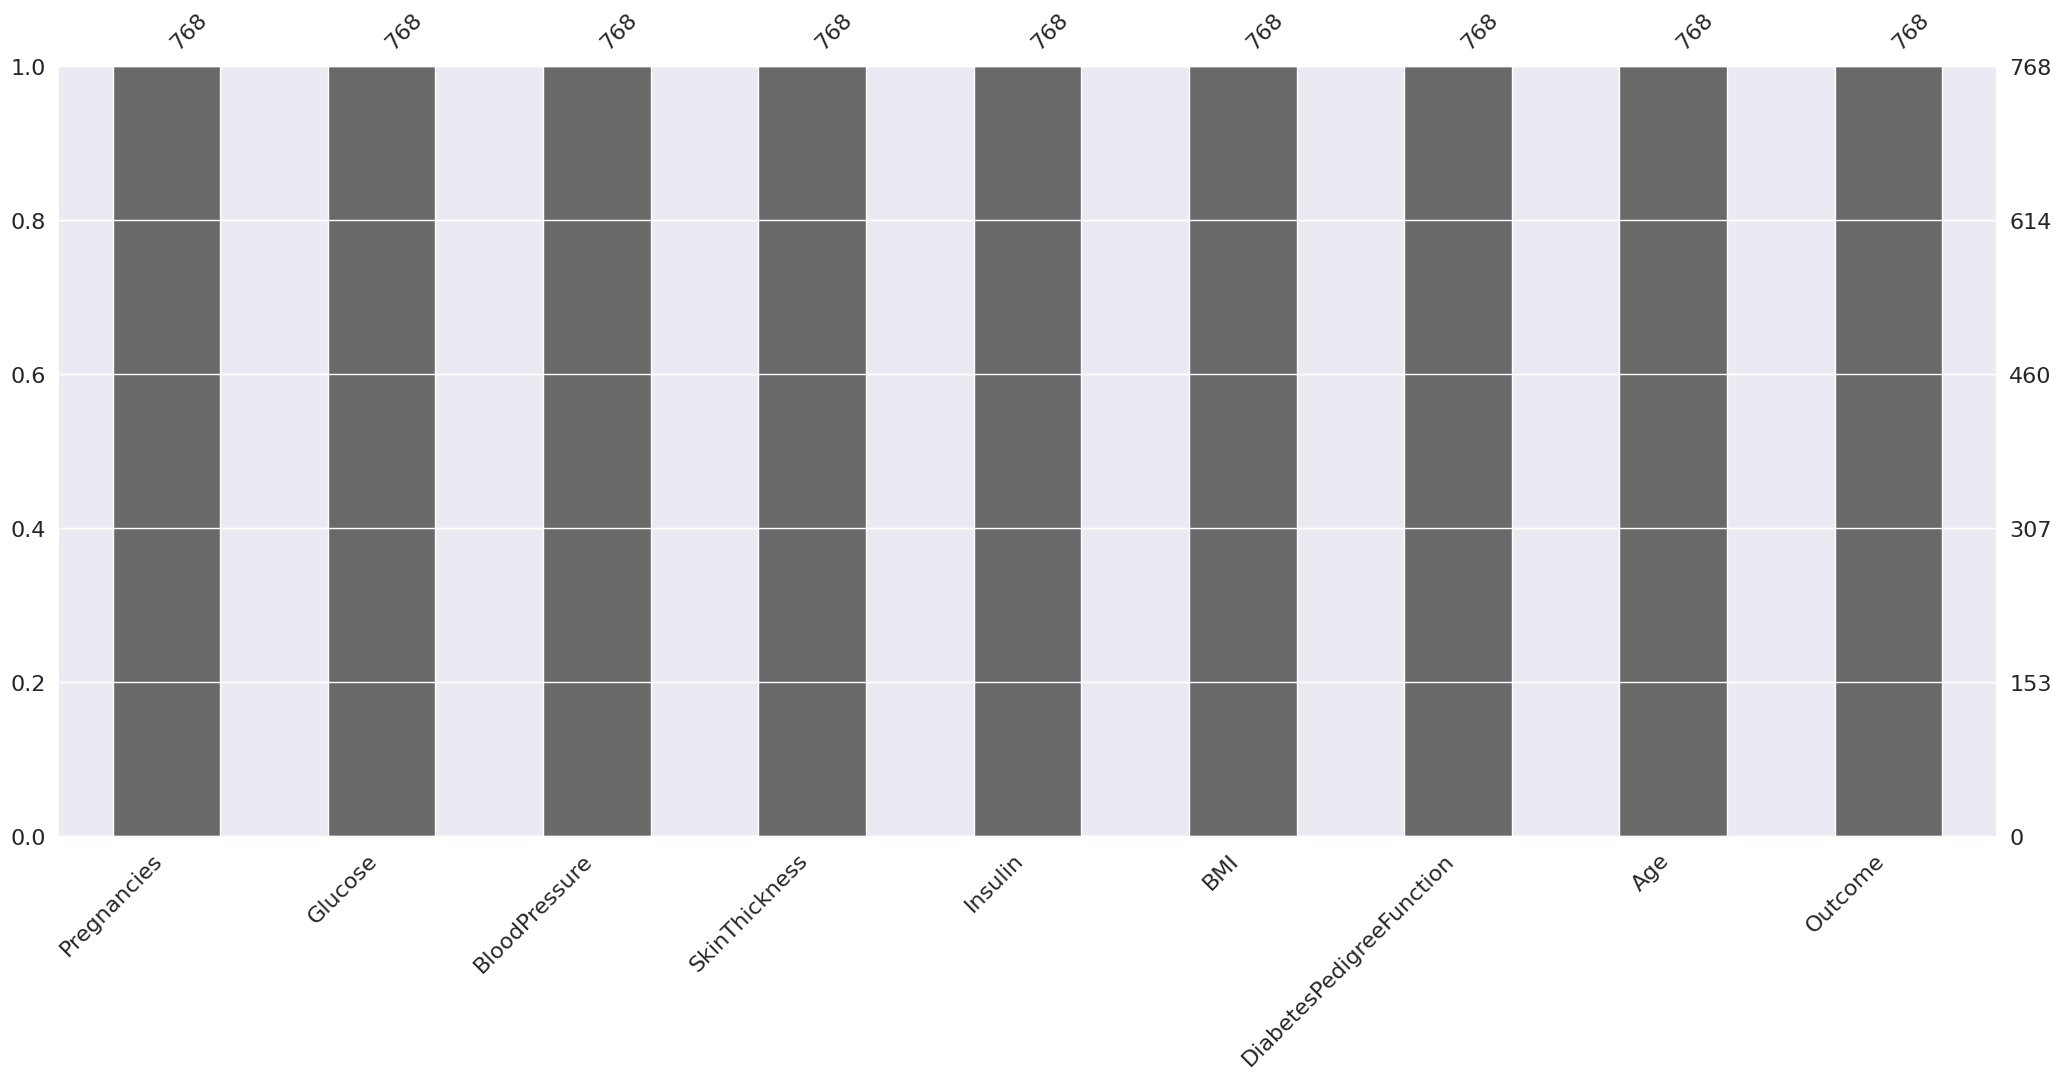

In [20]:
p = msno.bar(diabetes_df)

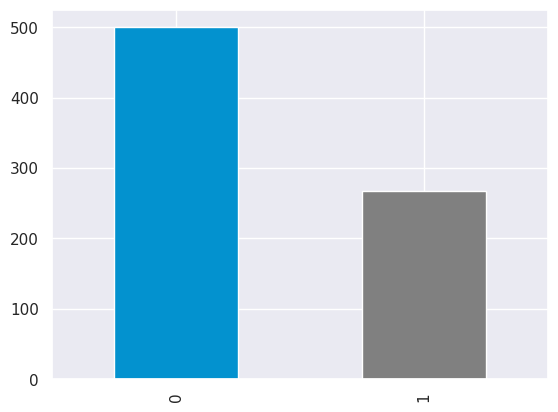

In [21]:
import matplotlib.pyplot as plt

# Define the color wheel with a default color for missing values
color_wheel = {1: "#0392cf", 2: "#7bc043"}

# Map colors to outcomes
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x, "gray"))

# Plot the bar chart with colors
p = diabetes_df["Outcome"].value_counts().plot(kind="bar", color=colors)

# Show the plot
plt.show()


Above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

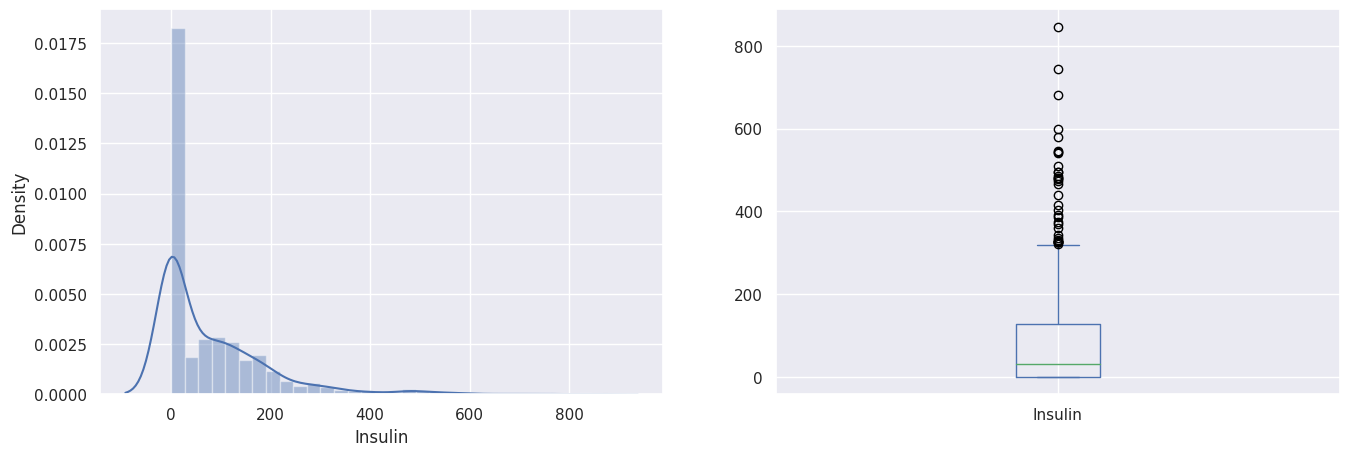

In [22]:
plt.subplot(121)
sns.distplot(diabetes_df['Insulin'])
plt.subplot(122)
diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

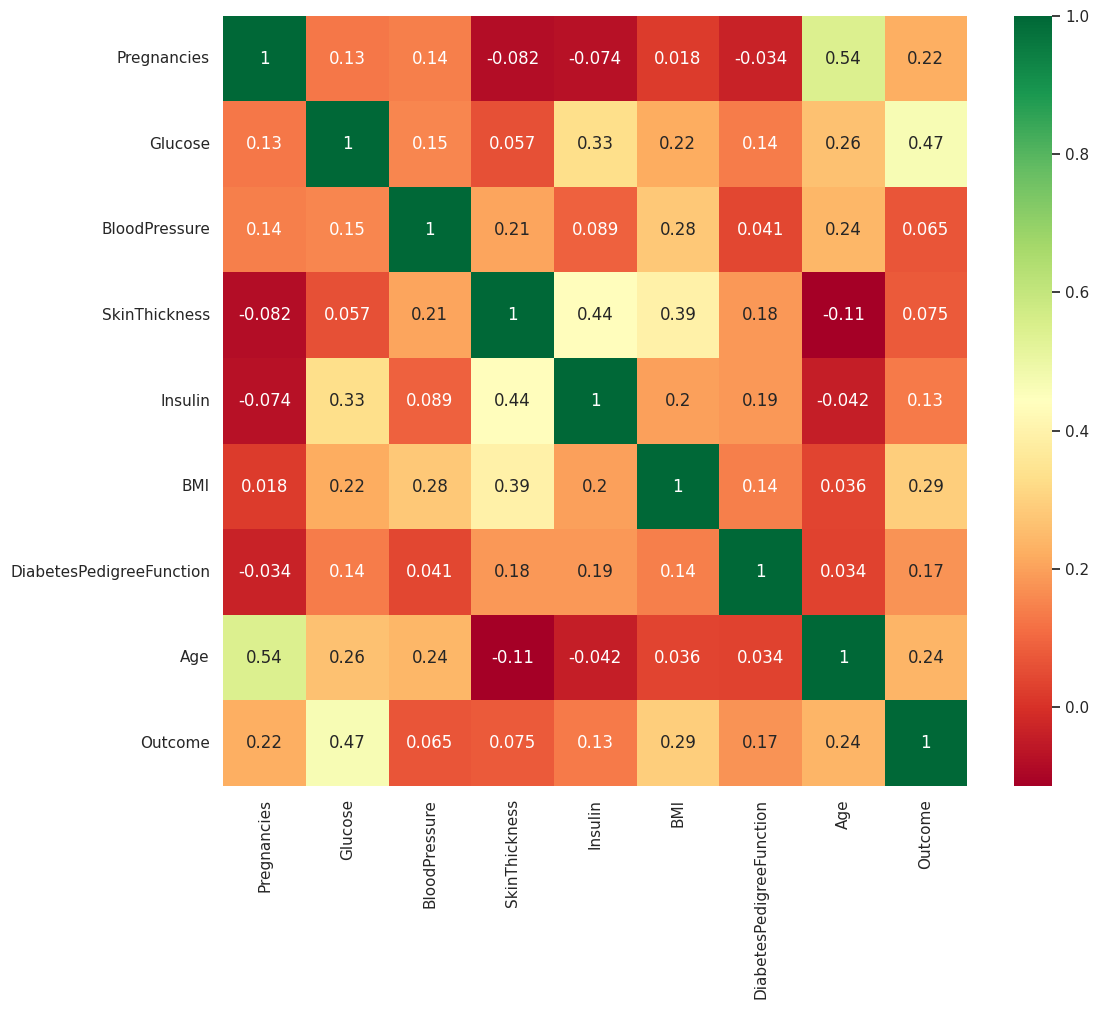

In [23]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(),annot=True,cmap ='RdYlGn')

In [24]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Scale the data**

In [25]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [26]:
diabetes_df_copy.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Model Building**

In [27]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)

**Random Forest**

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features=2, n_estimators =200 ,bootstrap = True)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200)

In [108]:
rfc_train = rfc.predict(X_train)

In [109]:
from sklearn import metrics
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7716535433070866


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[136  26]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       162
           1       0.70      0.65      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



**Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
from sklearn import metrics
predictions_1 = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions_1)))

Accuracy Score = 0.7007874015748031


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_1))
print(classification_report(y_test,predictions_1))

[[127  35]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.59      0.55      0.57        92

    accuracy                           0.70       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



**XgBoost classifier**

In [37]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
from sklearn import metrics
xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7283464566929134


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[128  34]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       162
           1       0.63      0.62      0.62        92

    accuracy                           0.73       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.73      0.73      0.73       254



**Support Vector Machine (SVM)**

In [40]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [41]:
svc_pred = svc_model.predict(X_test)

In [42]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [45]:
lr_pred = lr.predict(X_test)

In [46]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, lr_pred)))

Accuracy Score = 0.7559055118110236


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test,lr_pred))

[[141  21]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       162
           1       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



**KNN**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [49]:
knn_pred = knn.predict(X_test)

In [50]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, knn_pred)))

Accuracy Score = 0.7165354330708661


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test,knn_pred))

[[132  30]
 [ 42  50]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       162
           1       0.62      0.54      0.58        92

    accuracy                           0.72       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.71      0.72      0.71       254



**AdaBoost**

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = ada.fit(X_train, y_train)

In [53]:
ada_pred = ada.predict(X_test)

In [54]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, ada_pred)))

Accuracy Score = 0.7244094488188977


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ada_pred))
print(classification_report(y_test,ada_pred))

[[129  33]
 [ 37  55]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       162
           1       0.62      0.60      0.61        92

    accuracy                           0.72       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.72      0.72      0.72       254



**SVC as a base estimator**

In [56]:
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
ada_svm =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
model = ada_svm.fit(X_train, y_train)

In [57]:
ada_svm_pred = ada_svm.predict(X_test)

In [58]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, ada_svm_pred)))

Accuracy Score = 0.6377952755905512


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ada_svm_pred))
print(classification_report(y_test,ada_svm_pred))

[[162   0]
 [ 92   0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       162
           1       0.00      0.00      0.00        92

    accuracy                           0.64       254
   macro avg       0.32      0.50      0.39       254
weighted avg       0.41      0.64      0.50       254



**Results of All Models**

In [60]:
print("Accuracy_Score : Random Forest =", format(metrics.accuracy_score(y_test, predictions)))
print("Accuracy_Score : Decision Tree =", format(metrics.accuracy_score(y_test, predictions_1)))
print("Accuracy_Score : XgBoost classifier =", format(metrics.accuracy_score(y_test, xgb_pred)))
print("Accuracy_Score : Support Vector Machine (SVM) =", format(metrics.accuracy_score(y_test, svc_pred)))
print("Accuracy_Score : Logistic Regression =", format(metrics.accuracy_score(y_test, lr_pred)))
print("Accuracy_Score : KNN =", format(metrics.accuracy_score(y_test, knn_pred)))
print("Accuracy_Score : AdaBoost =", format(metrics.accuracy_score(y_test, ada_pred)))
print("Accuracy_Score : AdaBoost with SVM =", format(metrics.accuracy_score(y_test, ada_svm_pred)))

Accuracy_Score : Random Forest = 0.7716535433070866
Accuracy_Score : Decision Tree = 0.7007874015748031
Accuracy_Score : XgBoost classifier = 0.7283464566929134
Accuracy_Score : Support Vector Machine (SVM) = 0.7480314960629921
Accuracy_Score : Logistic Regression = 0.7559055118110236
Accuracy_Score : KNN = 0.7165354330708661
Accuracy_Score : AdaBoost = 0.7244094488188977
Accuracy_Score : AdaBoost with SVM = 0.6377952755905512


**Feature Importance using Random Forest Classifier**

Feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [61]:
rfc.feature_importances_

array([0.08219787, 0.24968044, 0.08921725, 0.07090009, 0.07192857,
       0.16683418, 0.13248217, 0.13675942])

<Axes: >

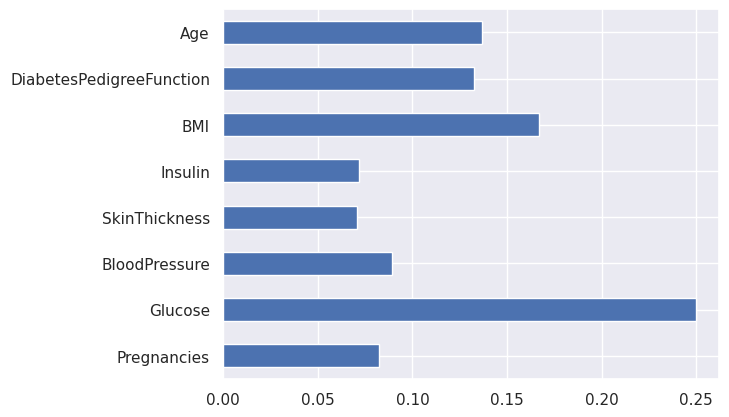

In [62]:
pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

**XAI- LIME**

In [63]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=5c9ee3d8cf0e54c92c74ede6dbffce49d57f11adae84dff2afe71942beb21377
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [64]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No diabetes', 'Has diabetes'],
    mode='classification'
)

In [74]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=rfc.predict_proba
)

exp.show_in_notebook(show_table=True,show_all = False)

In [76]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[10],
    predict_fn=rfc.predict_proba
)

exp.show_in_notebook(show_table=True)

**Saving Model – Random Forest**

In [115]:
import pickle
saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [116]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [71]:
diabetes_df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [117]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1])

In [118]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]]) # 763 th patient

array([0])